In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
from IPython.core.display import display, HTML

In [37]:
def preprocess(file_name):
    results = []
    with open(file_name) as csvfile:
        wine_reader = csv.reader(csvfile, dialect="excel", delimiter=';')
        for row in wine_reader:
            results.append(row)
    name_features = results[0]
    #print(name_features)
    parsed_results = []
    for row in results[1:]:
        new_row = []
        for num in row:
            new_row.append(float(num))
        parsed_results.append(new_row)
    parsed_results = np.array(parsed_results)
    n_instances = parsed_results.shape[0]
    n_features = parsed_results.shape[1] - 1
    labels = parsed_results[:, n_features]
    instances = parsed_results[:, : n_features]
    return instances, labels
white_instances, white_labels = preprocess('winequality-white.csv')
red_instances, red_labels = preprocess('winequality-red.csv')
white_two_classes = np.array([0 if num <6 else 1 for num in white_labels])
red_two_classes = np.array([0 if num <6 else 1 for num in red_labels])

In [8]:
def three_classes(wine_labels):
    transformed = []
    for score in wine_labels:
        if score <= 4:
            transformed.append("bad")
        elif score <= 6:
            transformed.append("medium")
        else:
            transformed.append("good")
    return np.array(transformed)
def four_classes(wine_labels):
    transformed = []
    for score in wine_labels:
        if score <= 4:
            transformed.append("bad")
        elif score == 5:
            transformed.append("medium low")
        elif score == 6:
            transformed.append("medium high")
        else:
            transformed.append("good")
    return np.array(transformed)

In [9]:
white_three_classes = three_classes(white_labels)
red_three_classes = three_classes(red_labels)
white_four_classes = four_classes(white_labels)
red_four_classes = four_classes(red_labels)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # for reporting
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # to normalize data (NN is very sensitive to this!)
from sklearn.model_selection import cross_val_score, GridSearchCV #BONUS

In [29]:
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()

In [46]:
def tune(params, clf, instances, labels):
    x_train, x_test, y_train, y_test = train_test_split(instances, labels)
    gs = GridSearchCV(clf, param_grid=params, cv=5)
    gs.fit(x_train, y_train)
    return gs.best_params_

In [60]:
params = {'max_features': [None, 'auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy']}
print("DT classifier: \n")
print("best for white (2 classes)", tune(params, DecisionTreeClassifier(), white_instances, white_two_classes))
print("best for white (3 classes)", tune(params, DecisionTreeClassifier(), white_instances, white_three_classes))
print("best for white (4 classes)", tune(params, DecisionTreeClassifier(), white_instances, white_four_classes))
print("\n")
print("best for red (2 classes)", tune(params, DecisionTreeClassifier(), red_instances, red_two_classes))
print("best for red (3 classes)", tune(params, DecisionTreeClassifier(), red_instances, red_three_classes))
print("best for red (4 classes)", tune(params, DecisionTreeClassifier(), red_instances, red_four_classes))

DT classifier: 

best for white (2 classes) {'criterion': 'entropy', 'max_features': 'log2'}
best for white (3 classes) {'criterion': 'entropy', 'max_features': None}
best for white (4 classes) {'criterion': 'entropy', 'max_features': 'sqrt'}


best for red (2 classes) {'criterion': 'entropy', 'max_features': None}
best for red (3 classes) {'criterion': 'gini', 'max_features': 'sqrt'}
best for red (4 classes) {'criterion': 'gini', 'max_features': None}


In [49]:
rfc_params = {'max_features': [None, 'auto', 'sqrt', 'log2'], 'criterion': ['entropy', 'gini']}
print("tune(rfc_params, RandomForestClassifier(), white_instances, white_two_classes)

In [61]:
print("RF classifier: \n")
print("best for white (2 classes)", tune(params, RandomForestClassifier(), white_instances, white_two_classes))
print("best for white (3 classes)", tune(params, RandomForestClassifier(), white_instances, white_three_classes))
print("best for white (4 classes)", tune(params, RandomForestClassifier(), white_instances, white_four_classes))
print("\n")
print("best for red (2 classes)", tune(params, RandomForestClassifier(), red_instances, red_two_classes))
print("best for red (3 classes)", tune(params, RandomForestClassifier(), red_instances, red_three_classes))
print("best for red (4 classes)", tune(params, RandomForestClassifier(), red_instances, red_four_classes))

RF classifier: 

best for white (2 classes) {'criterion': 'entropy', 'max_features': 'sqrt'}
best for white (3 classes) {'criterion': 'gini', 'max_features': 'log2'}
best for white (4 classes) {'criterion': 'entropy', 'max_features': 'log2'}


best for red (2 classes) {'criterion': 'entropy', 'max_features': 'log2'}
best for red (3 classes) {'criterion': 'gini', 'max_features': 'sqrt'}
best for red (4 classes) {'criterion': 'gini', 'max_features': 'log2'}


In [100]:
def produce_report(clf_name, clf, instances, labels):
    x_train, x_test, y_train, y_test = train_test_split(instances, labels)
    clf = clf
    preds = clf.fit(x_train, y_train).predict(x_test)
    display(HTML('<h4>' + clf_name + "'s accuracy: </h4>"))
    print(accuracy_score(y_test, preds))
    display(HTML('<strong>Report</strong>:\n'))
    print(classification_report(y_test, preds), "\n")
    return y_test, preds


## Decision Tree Results

In [168]:
display(HTML('<h3>For White Wine: </h3>'))
y_test_white_dt, y_score_white_dt = produce_report('DT for white wine (2 classes)', 
                                       DecisionTreeClassifier(max_features='log2', 
                                    criterion='entropy'), white_instances, white_two_classes)
produce_report('DT for white wine (3 classes)', DecisionTreeClassifier(max_features=None, 
                                      criterion='entropy'), white_instances, white_three_classes)
produce_report('DT for white wine (4 classes)', DecisionTreeClassifier(max_features='sqrt', 
                                      criterion='entropy'), white_instances, white_four_classes)
display(HTML('<h3>For Red Wine: </h3>'))
y_test_red_dt, y_score_red_dt = produce_report('DT for red wine (2 classes)', 
                                       DecisionTreeClassifier(max_features=None, 
                                      criterion='entropy'), red_instances, red_two_classes)
produce_report('DT for red wine (3 classes)', DecisionTreeClassifier(max_features='sqrt', 
                                      criterion='gini'), red_instances, red_three_classes)
produce_report('DT for red wine (4 classes)', DecisionTreeClassifier(max_features=None, 
                                      criterion='gini'), red_instances, red_four_classes)


0.765714285714


             precision    recall  f1-score   support

          0       0.64      0.66      0.65       407
          1       0.83      0.82      0.82       818

avg / total       0.77      0.77      0.77      1225
 



0.779591836735


             precision    recall  f1-score   support

        bad       0.31      0.34      0.33        44
       good       0.60      0.61      0.61       268
     medium       0.86      0.85      0.85       913

avg / total       0.78      0.78      0.78      1225
 



0.609795918367


             precision    recall  f1-score   support

        bad       0.26      0.21      0.24        47
       good       0.60      0.59      0.60       254
medium high       0.62      0.63      0.63       546
 medium low       0.63      0.64      0.64       378

avg / total       0.61      0.61      0.61      1225
 



0.7775


             precision    recall  f1-score   support

          0       0.70      0.78      0.74       161
          1       0.84      0.77      0.81       239

avg / total       0.78      0.78      0.78       400
 



0.82


             precision    recall  f1-score   support

        bad       0.06      0.10      0.08        10
       good       0.61      0.50      0.55        60
     medium       0.89      0.90      0.89       330

avg / total       0.82      0.82      0.82       400
 



0.6025


             precision    recall  f1-score   support

        bad       0.14      0.06      0.09        16
       good       0.50      0.42      0.46        64
medium high       0.56      0.66      0.61       157
 medium low       0.71      0.67      0.69       163

avg / total       0.59      0.60      0.60       400
 



(array(['medium high', 'medium high', 'good', 'medium high', 'medium high',
        'medium low', 'bad', 'medium low', 'medium low', 'medium low',
        'medium low', 'medium high', 'good', 'medium high', 'medium high',
        'good', 'medium high', 'medium high', 'good', 'medium high', 'good',
        'medium high', 'medium high', 'good', 'medium low', 'medium low',
        'medium high', 'medium high', 'medium high', 'medium high',
        'medium high', 'medium high', 'medium low', 'medium low',
        'medium low', 'medium high', 'medium high', 'medium low',
        'medium high', 'medium high', 'medium high', 'medium high',
        'medium low', 'good', 'medium high', 'medium low', 'medium low',
        'medium low', 'medium low', 'medium low', 'medium low', 'good',
        'medium high', 'medium high', 'medium low', 'medium low', 'good',
        'medium low', 'medium low', 'medium low', 'good', 'medium low',
        'medium low', 'medium high', 'medium high', 'good', 'medium 

## Random Forest Results

In [169]:
display(HTML('<h3>For White Wine: </h3>'))
y_test_white_rf, y_score_white_rf = produce_report('RF for white wine (2 classes)', 
                                       RandomForestClassifier(max_features='sqrt', 
                                      criterion='entropy'), white_instances, white_two_classes)
produce_report('RF for white wine (3 classes)', RandomForestClassifier(max_features='log2', 
                                      criterion='gini'), white_instances, white_three_classes)
produce_report('RF for white wine (4 classes)', DecisionTreeClassifier(max_features='log2', 
                                      criterion='entropy'), white_instances, white_four_classes)
display(HTML('<h3>For Red Wine: </h3>'))
y_test_red_rf, y_score_red_rf = produce_report('RF for red wine (2 classes)', 
                                       RandomForestClassifier(max_features='log2', 
                                      criterion='entropy'), red_instances, red_two_classes)
produce_report('RF for red wine (3 classes)', RandomForestClassifier(max_features='sqrt', 
                                      criterion='gini'), red_instances, red_three_classes)
produce_report('RF for red wine (4 classes)', RandomForestClassifier(max_features='log2', 
                                      criterion='gini'), red_instances, red_four_classes)


0.822857142857


             precision    recall  f1-score   support

          0       0.75      0.74      0.75       430
          1       0.86      0.87      0.86       795

avg / total       0.82      0.82      0.82      1225
 



0.815510204082


             precision    recall  f1-score   support

        bad       0.50      0.17      0.25        41
       good       0.70      0.62      0.65       286
     medium       0.85      0.91      0.88       898

avg / total       0.80      0.82      0.81      1225
 



0.619591836735


             precision    recall  f1-score   support

        bad       0.23      0.17      0.20        40
       good       0.62      0.62      0.62       276
medium high       0.62      0.65      0.63       527
 medium low       0.65      0.63      0.64       382

avg / total       0.62      0.62      0.62      1225
 



0.835


             precision    recall  f1-score   support

          0       0.78      0.87      0.82       178
          1       0.89      0.81      0.84       222

avg / total       0.84      0.83      0.84       400
 



0.8825


             precision    recall  f1-score   support

        bad       0.60      0.21      0.32        14
       good       0.89      0.51      0.65        61
     medium       0.89      0.98      0.93       325

avg / total       0.88      0.88      0.87       400
 



0.6625


             precision    recall  f1-score   support

        bad       0.60      0.16      0.25        19
       good       0.60      0.56      0.58        54
medium high       0.67      0.65      0.66       174
 medium low       0.67      0.78      0.72       153

avg / total       0.66      0.66      0.65       400
 



(array(['medium low', 'medium high', 'good', 'bad', 'medium low',
        'medium high', 'medium low', 'medium high', 'medium low',
        'medium low', 'good', 'medium high', 'medium high', 'medium high',
        'medium high', 'medium low', 'medium high', 'medium high',
        'medium low', 'medium high', 'medium low', 'bad', 'medium high',
        'medium low', 'medium low', 'medium high', 'medium low', 'bad',
        'medium high', 'medium high', 'medium low', 'good', 'medium high',
        'medium high', 'medium low', 'medium high', 'medium low',
        'medium low', 'good', 'medium low', 'medium high', 'medium low',
        'medium low', 'good', 'medium high', 'medium high', 'medium low',
        'good', 'medium high', 'good', 'medium high', 'medium low',
        'medium low', 'good', 'medium high', 'medium high', 'medium low',
        'medium low', 'medium low', 'medium high', 'good', 'medium high',
        'medium low', 'medium high', 'medium high', 'medium high', 'bad',
   

## ROC Curve for Decision Tree

In [170]:
# Compute ROC curve and ROC area for each class
def draw_curve(title, y_test, y_preds):    
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

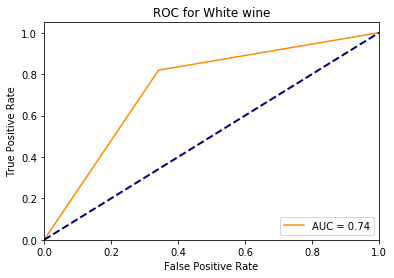

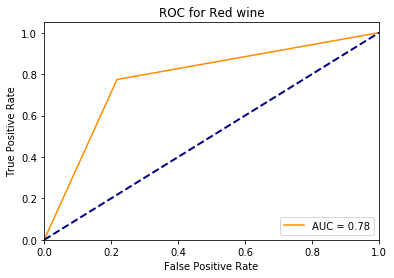

In [171]:
draw_curve('ROC for White wine', y_test_white_dt, y_score_white_dt)
draw_curve('ROC for Red wine', y_test_red_dt, y_score_red_dt)

## ROC Curve for Random Forest

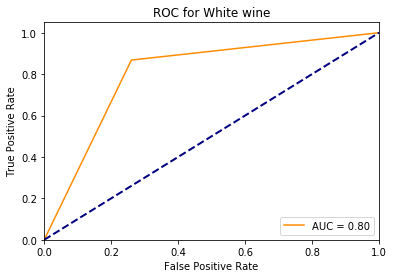

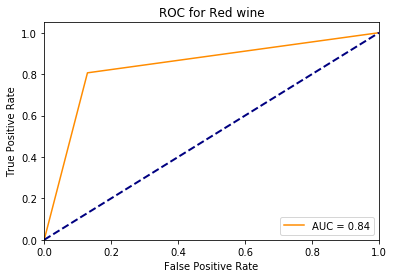

In [172]:
draw_curve("ROC for White wine", y_test_white_rf, y_score_white_rf)
draw_curve("ROC for Red wine", y_test_red_rf, y_score_red_rf)